In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_excel('/Users/gretchenwang/Github/group4-project/Cleaned_Data.xlsx')
df.head()

,Watershed,Latitude,Longitude,StartDate,StartTime,DWM_Name,DWM_Units,ResVal,nResult
0,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Ammonia-N,mg/L,<0.20,-0.200
1,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Nitrate/Nitrite-N,mg/L,<0.20,-0.200
2,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Total Nitrogen,mg/L,0.77,0.770
3,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Total Phosphorus,mg/L,0.056,0.056
4,South Coastal,42.187649,-70.768508,6/25/2019,1:50:00 PM,Ammonia-N,mg/L,<0.20,-0.200


,Watershed,Latitude,Longitude,StartDate,StartTime,DWM_Name,DWM_Units,ResVal,nResult
381,South Coastal,41.848792,-70.549915,2011-09-14,1:20:00 PM,Total Nitrogen,mg/L,0.44,0.44
384,South Coastal,41.986540,-70.698858,2011-06-28,2:20:00 PM,Total Nitrogen,mg/L,0.67,0.67
386,South Coastal,41.987834,-70.707868,2011-06-28,2:46:00 PM,Total Nitrogen,mg/L,0.80,0.80
388,South Coastal,42.003955,-70.722156,2011-06-28,3:27:00 PM,Total Nitrogen,mg/L,0.59,0.59
390,South Coastal,41.997918,-70.722181,2011-06-28,4:08:00 PM,Total Nitrogen,mg/L,0.78,0.78


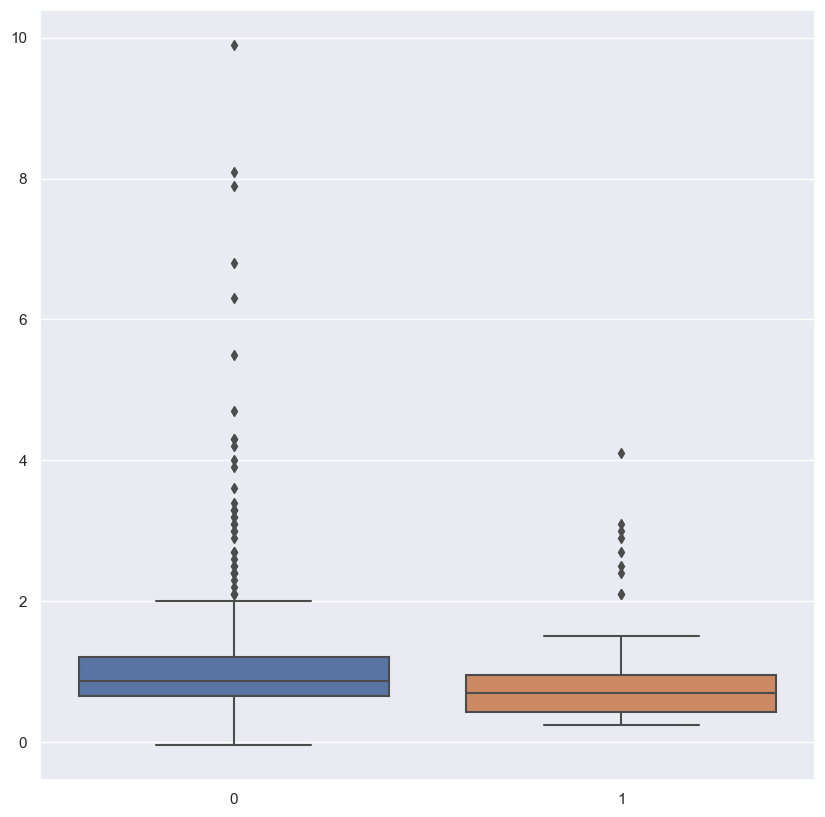

In [45]:
df_copy= df.copy()

df_copy['StartDate'] = pd.to_datetime(df_copy['StartDate'], format='%m/%d/%Y')

nitrogen_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Total Nitrogen')]
nitrogen_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Total Nitrogen')]

import seaborn as sns

nitrogen_data = [nitrogen_pre2013_df['nResult'], nitrogen_post2013_df['nResult']]
sns.boxplot(data=nitrogen_data)
sns.set(rc={"figure.figsize":(10, 10)})
nitrogen_pre2013_df.head()







<AxesSubplot:>

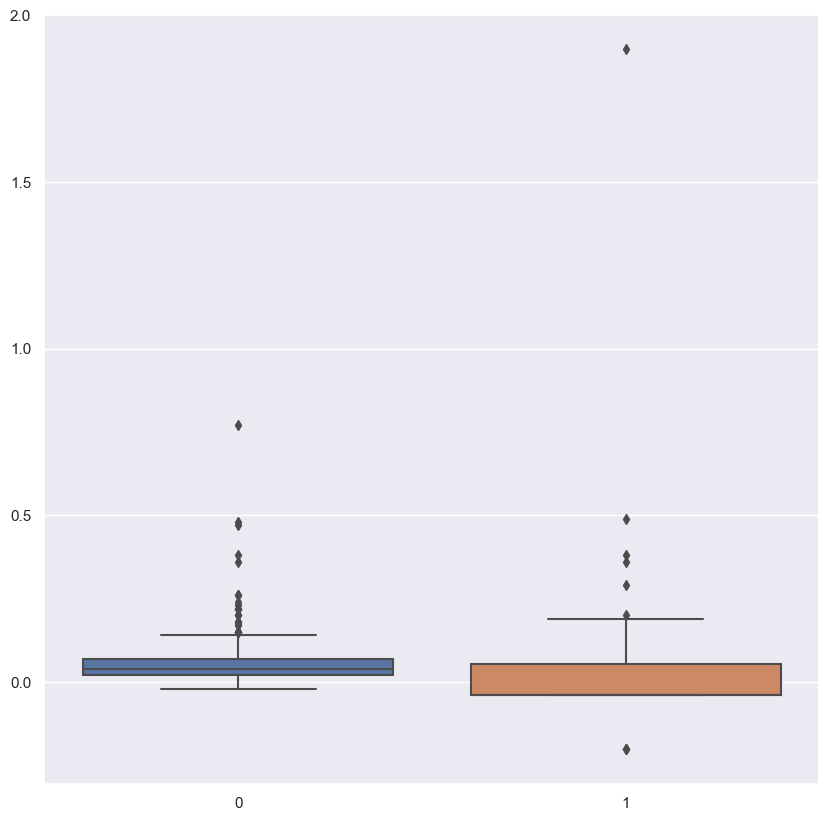

In [62]:
ammonia_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Ammonia-N')]
ammonia_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Ammonia-N')]

import seaborn as sns

ammonia_data = [ammonia_pre2013_df['nResult'], ammonia_post2013_df['nResult']]
sns.boxplot(data=ammonia_data)


<AxesSubplot:>

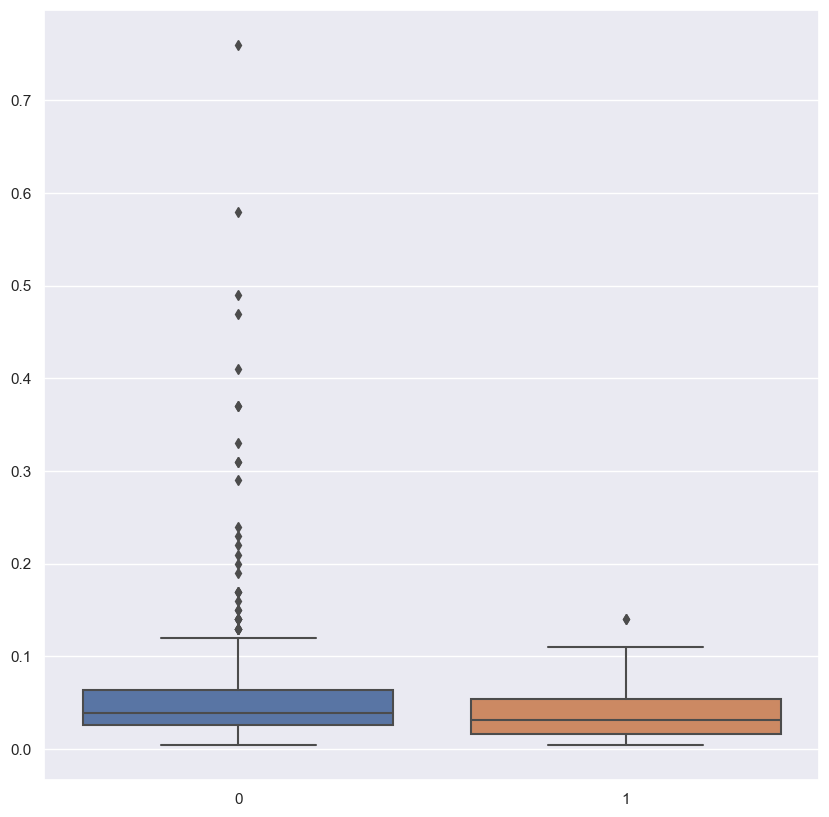

In [61]:
phosphorus_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Total Phosphorus')]
phosphorus_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Total Phosphorus')]

import seaborn as sns

phosphorus_data = [phosphorus_pre2013_df['nResult'], phosphorus_post2013_df['nResult']]
sns.boxplot(data=phosphorus_data)


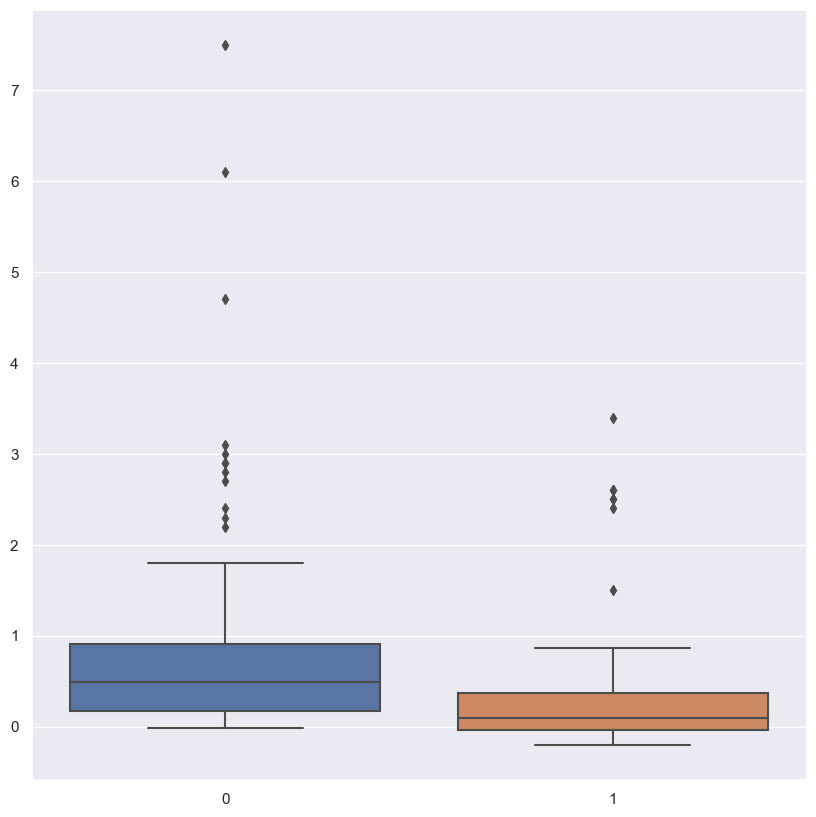

In [64]:
nitrate_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Nitrate/Nitrite-N')]
nitrate_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Nitrate/Nitrite-N')]

import seaborn as sns

nitrate_data = [nitrate_pre2013_df['nResult'], nitrate_post2013_df['nResult']]
sns.boxplot(data=nitrate_data)
plt.show()

In [48]:
urbanfarm_df = pd.read_excel('/Users/gretchenwang/Github/group4-project/Urban Farm Location Data.xlsx')
urbanfarm_df.head()
urbanfarm_df

,Urban_Farm,Latitude,Longitude,Date_Started
0,"GLENWAY FARM, DORCHESTER",42.298743,-71.081662,2013
1,THE WEST COTTAGE FARM,42.320561,-71.074605,2013
2,87-89 CALLENDER STREET,42.288775,-71.082470,2016
3,SPORTSMEN'S TENNIS AND ENRICHMENT CENTER,42.292033,-71.088257,2013
4,CORNER STALK FARM,42.382788,-71.038268,2014
5,EASTIE FARM,42.368045,-71.036864,2015
6,FENWAY FARMS,42.346736,-71.097238,2015
7,WE GROW MICROGREENS,42.243007,-71.136730,2019
8,ALLANDALE FARMS,42.302382,-71.139116,1800
9,ASTORIA FARM,42.280889,-71.086793,2017


In [59]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    distance_lon = lon2-lon1
    distance_lat = lat2-lat1
    a = sin(distance_lat/2)**2 + cos(lat1) * cos(lat2) * sin(distance_lon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6367 * c
    return km

distances = []
for i, sample in df_copy.iterrows():
    min_distance = np.inf
    for j, farm in urbanfarm_df.iterrows():
        distance = haversine(sample['Latitude'], sample['Longitude'], farm['Latitude'], farm['Longitude'])
        if distance < min_distance:
            min_distance=distance
    distances.append(min_distance)

df_copy['closest_farm_distance_km'] = distances

df_copy.head()





,Watershed,Latitude,Longitude,StartDate,StartTime,DWM_Name,DWM_Units,ResVal,nResult,closest_farm_distance_km
0,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Ammonia-N,mg/L,<0.20,-0.200,27.900587
1,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Nitrate/Nitrite-N,mg/L,<0.20,-0.200,27.900587
2,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Total Nitrogen,mg/L,0.77,0.770,27.900587
3,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Total Phosphorus,mg/L,0.056,0.056,27.900587
4,South Coastal,42.187649,-70.768508,2019-06-25,1:50:00 PM,Ammonia-N,mg/L,<0.20,-0.200,28.037568


<AxesSubplot:xlabel='closest_farm_distance_km', ylabel='nResult'>

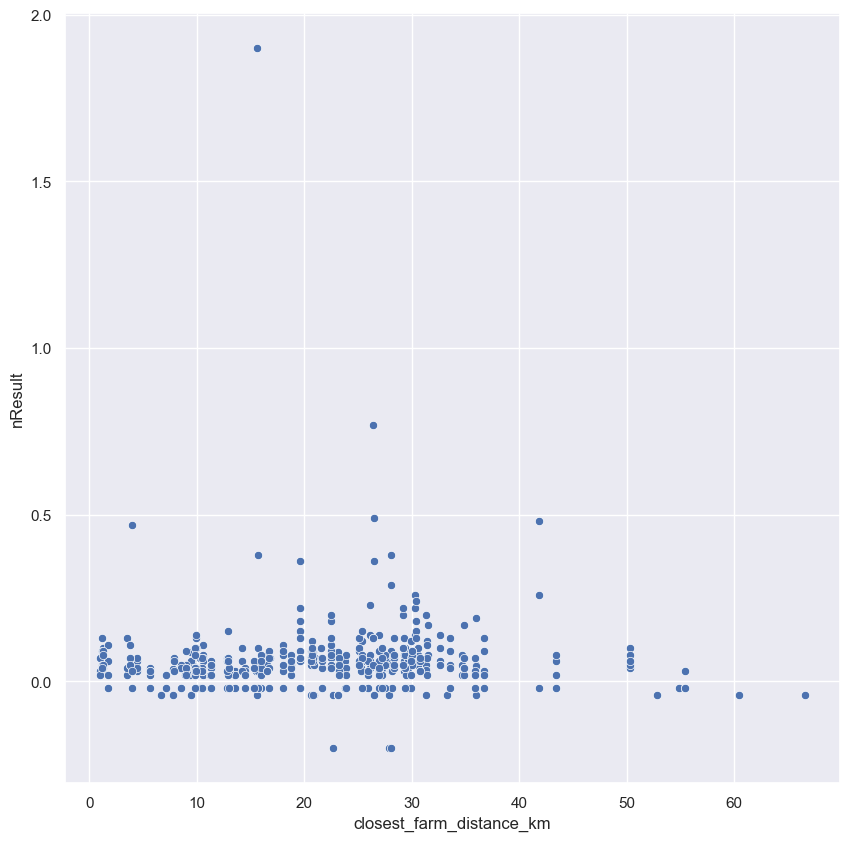

In [58]:
sns.set_theme()

ammonia_distance_df = df_copy.loc[(df_copy['DWM_Name'] == 'Ammonia-N')]
sns.scatterplot(data=ammonia_distance_df, x='closest_farm_distance_km', y='nResult')


Text(0.5, 0, 'km to closest urban farm')

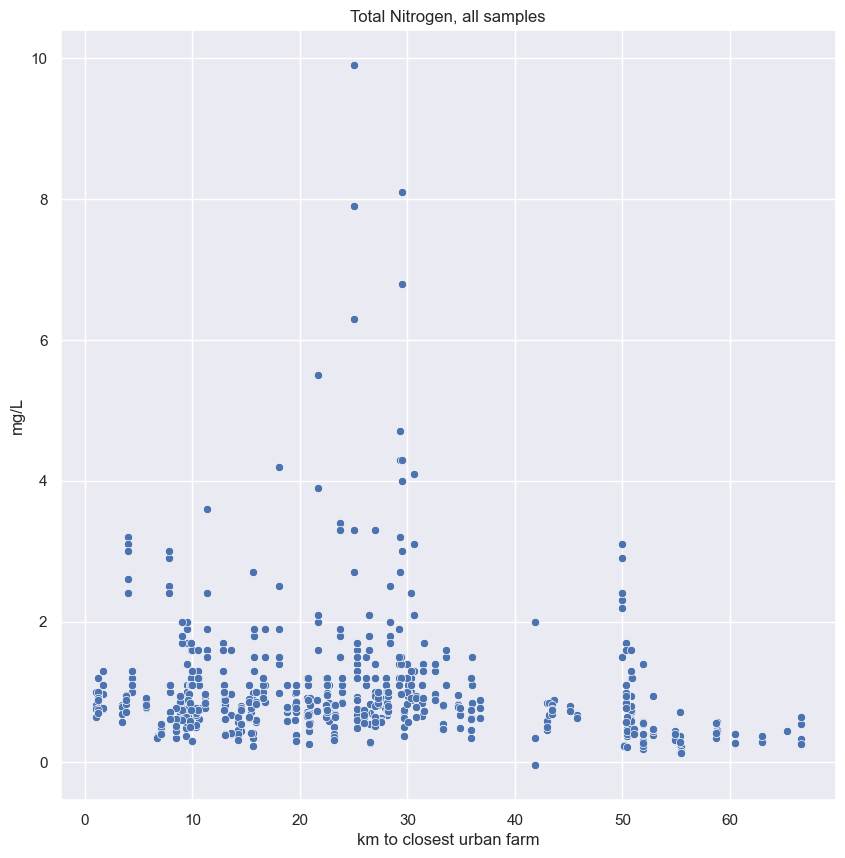

In [57]:
nitrogen_distance_df = df_copy.loc[(df_copy['DWM_Name'] == 'Total Nitrogen')]
figure, ax = plt.subplots()
sns.scatterplot(data=nitrogen_distance_df, x='closest_farm_distance_km', y='nResult')
ax.set_title('Total Nitrogen, all samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')



<AxesSubplot:xlabel='closest_farm_distance_km', ylabel='nResult'>

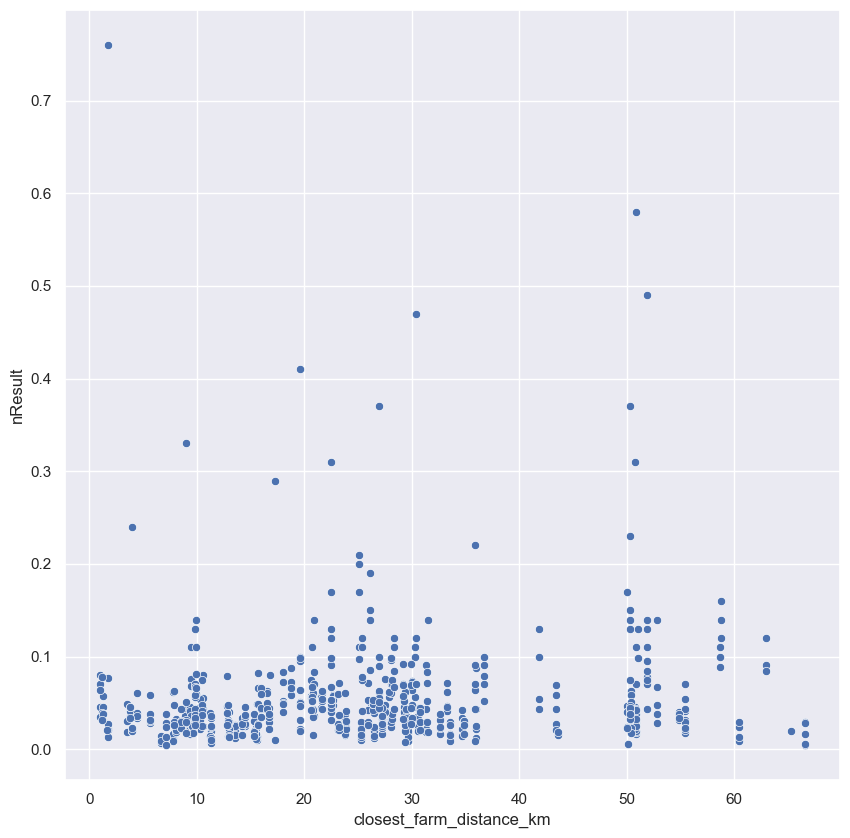

In [52]:
phosphorus_distance_df = df_copy.loc[(df_copy['DWM_Name'] == 'Total Phosphorus')]
sns.scatterplot(data=phosphorus_distance_df, x='closest_farm_distance_km', y='nResult')


<AxesSubplot:xlabel='closest_farm_distance_km', ylabel='nResult'>

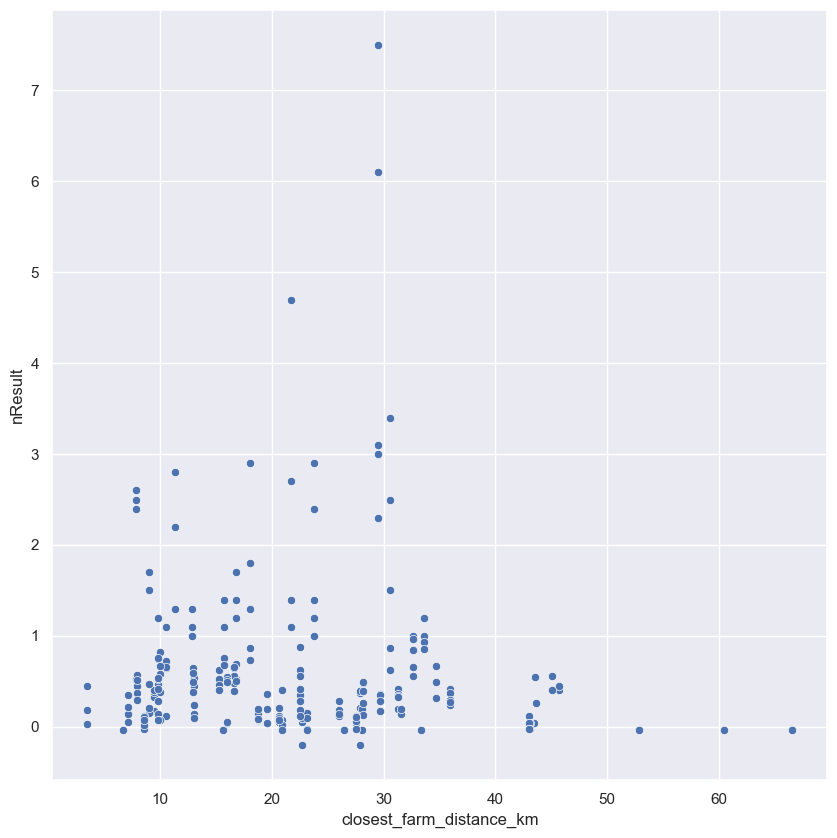

In [55]:
nitrate_distance_df = df_copy.loc[(df_copy['DWM_Name'] == 'Nitrate/Nitrite-N')]
sns.scatterplot(data=nitrate_distance_df, x='closest_farm_distance_km', y='nResult')


In [60]:
import statsmodels.formula.api as smf
ols_nitrogen_pre_2013 = smf.ols(formula='nResult ~ closest_farm_distance_km', data= nitrogen_pre2013_df).fit()
ols_nitrogen_post_2013 = smf.ols(formula='nResult ~ closest_farm_distance_km', data= nitrogen_post2013_df).fit()
ols_nitrogen_post_2013.summary()

PatsyError: Error evaluating factor: NameError: name 'closest_farm_distance_km' is not defined
    nResult ~ closest_farm_distance_km
              ^^^^^^^^^^^^^^^^^^^^^^^^

<AxesSubplot:xlabel='closest_farm_distance_km', ylabel='nResult'>

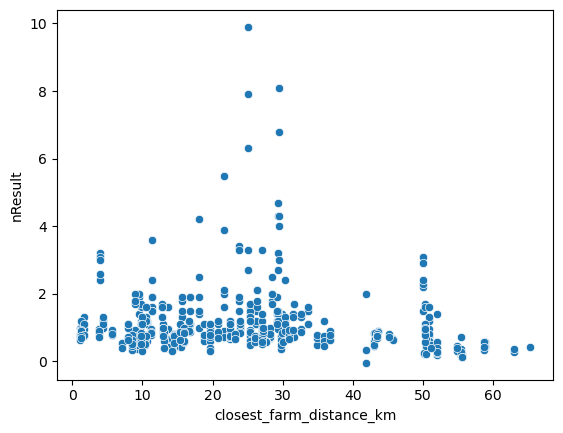

In [ ]:
sns.scatterplot(data=nitrogen_pre2013_df, x='closest_farm_distance_km', y= 'nResult')

<AxesSubplot:xlabel='closest_farm_distance_km', ylabel='nResult'>

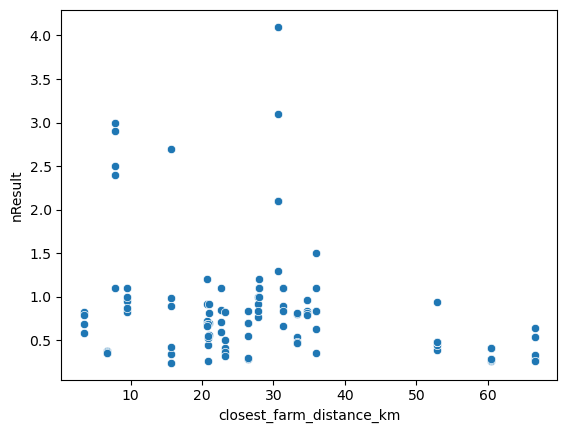

In [ ]:
sns.scatterplot(data=nitrogen_post2013_df, x='closest_farm_distance_km', y= 'nResult')